In [1]:
import pandas as pd
import charset_normalizer
import seaborn as sns

from collections import Counter

In [ ]:
path = "dataset/RU_youtube_trending_data.csv"
data = pd.read_csv(path)
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...
3,oD3FOzQDuy0,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,UCC83eap-hc6uFQHRJ2F2LNg,TheKateClapp,22,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,https://i.ytimg.com/vi/oD3FOzQDuy0/default.jpg,False,False,"Вырвалась из КАРАНТИНА! Лучшее, что случилось ..."
4,26gteilUAuQ,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,UCQ4YOFsXjG9eXWZ6uLj2t2A,Соловьёв LIVE,25,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,https://i.ytimg.com/vi/26gteilUAuQ/default.jpg,False,False,🌞 Доброе утро!📻 Устанавливаем «Полный контакт»...


In [3]:
data.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          16978
dtype: int64

In [4]:
data["publishedAt"] = pd.to_datetime(data["publishedAt"], format="%Y-%m-%dT%H:%M:%SZ")

In [5]:
data["trending_date"] = pd.to_datetime(data["trending_date"], format="%Y-%m-%dT%H:%M:%SZ")

<Axes: xlabel='categoryId', ylabel='likes'>

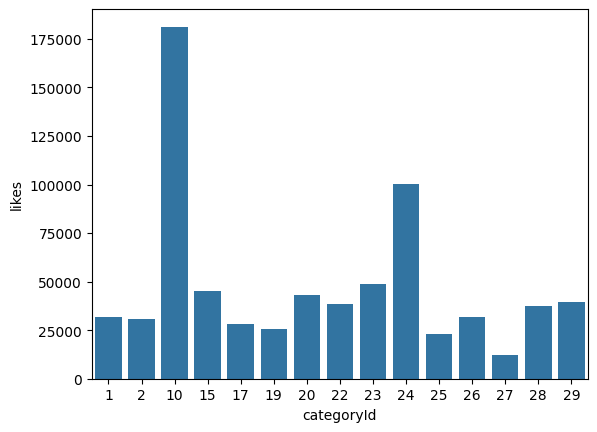

In [6]:
#Среднее количество лайков для каждой категории
sns.barplot(data.groupby("categoryId")["likes"].mean())

In [7]:
data["delta"] = (data["trending_date"] - data["publishedAt"]).dt.total_seconds() / 3600

In [8]:
mean_time_between_create_and_trend = data.groupby("categoryId")["delta"].agg(["mean", "std", "min", "max"])
mean_time_between_create_and_trend

,mean,std,min,max
categoryId,,,,
1,25.943068,33.238260,-15.317222,708.985278
2,24.679726,21.416095,-13.075833,532.269722
10,25.999016,34.219208,-13.801944,728.748889
15,32.758148,50.367306,-9.500000,714.996944
17,23.308616,34.949873,-14.363333,705.690833
19,25.956310,30.701269,-10.110556,595.499167
20,22.338077,23.891731,-16.717778,708.400000
22,27.043152,34.567652,-14.482778,730.107778
23,28.506134,36.483594,-12.014722,683.503889


<Axes: >

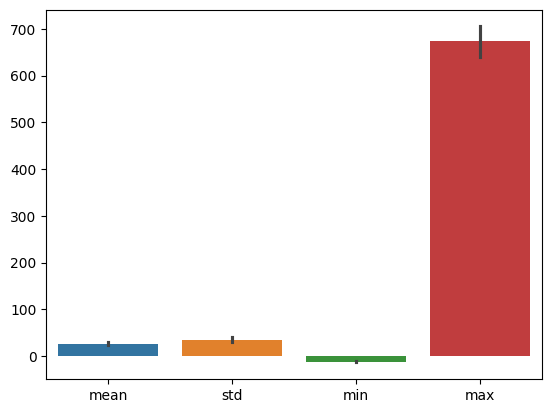

In [9]:
sns.barplot(mean_time_between_create_and_trend)

5519904


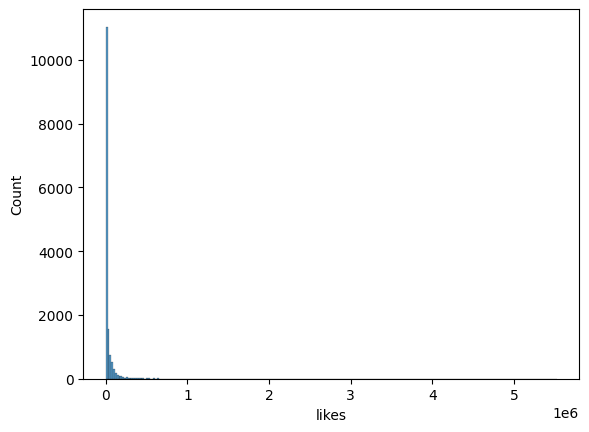

In [10]:
import matplotlib.pyplot as plt

category_1_likes = data["likes"][data["categoryId"] == 1]

#category_1_likes = (category_1_likes - category_1_likes.mean()) / category_1_likes.std()
sns.histplot(x=category_1_likes)
print(category_1_likes.max())

In [11]:
#Основная информация о лайках для каждой трендовой группы
info_about_likes_avarage_group = data.groupby("categoryId")["likes"].agg(["min", "max", "mean", "std", "count"])
info_about_likes_avarage_group

,min,max,mean,std,count
categoryId,,,,,
1,0,5519904,31564.377710,115377.599793,15038
2,0,1258426,30835.626393,41618.555466,12829
10,0,14678180,181259.327365,646503.774685,15136
15,0,1278459,45334.409912,88930.663327,1937
17,0,6752251,28254.386094,120613.001868,16439
19,0,1195345,25652.768452,55391.887313,1680
20,0,10405236,43297.644177,124418.207850,33882
22,0,3867285,38521.581244,86344.401089,42514
23,0,8278389,48623.815684,135507.776491,15430


<Axes: xlabel='categoryId', ylabel='categoryId'>

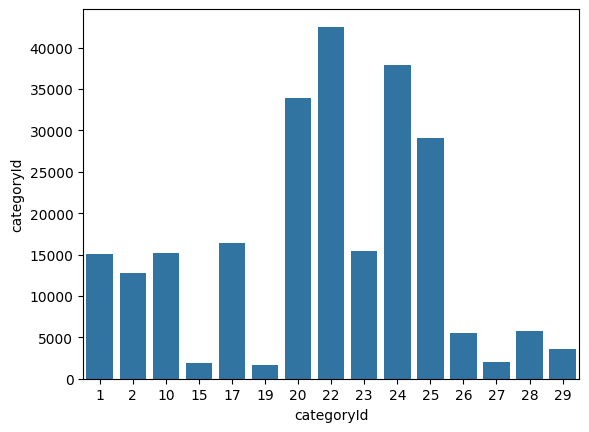

In [12]:
sns.barplot(data.groupby("categoryId")["categoryId"].count())
#Сколько трендовых видео было в каждой группе

In [13]:
#Можно посмотреть на соотношение лайков и комментов в каждой группе, лайков и дислайков

In [14]:
data["likes_to_comments"] = data["likes"] / data["comment_count"]
data.groupby("categoryId")["likes_to_comments"].agg(["min", "max"])

,min,max
categoryId,,
1,0.0,inf
2,0.0,inf
10,0.0,inf
15,0.0,inf
17,0.0,inf
19,0.0,inf
20,0.0,inf
22,0.0,inf
23,0.0,inf


In [15]:
data["channelTitle"].value_counts() #Какой канал сколько раз попадал в реки

channelTitle
A4                                 1767
Телеканал Дождь                    1619
Матч ТВ                            1484
EdisonPts                          1368
MrLololoshka (Роман Фильченков)    1248
                                   ... 
Depeche Mode                          1
Élysée                                1
Red Bull Racing Honda                 1
ARO-ka                                1
Светлый Voiceover                     1
Name: count, Length: 8482, dtype: int64

In [16]:
data.groupby("channelTitle")["categoryId"].nunique() #количество категорий для каждого канала

channelTitle
 Armenchik                               1
 Исторический Вольнодумец                1
#1 VLOG О ЖИЗНИ И ПЕРЕЕЗДЕ ЗА ГРАНИЦУ    1
#2Mashi - Topic                          1
#KYIVSTONER                              2
                                        ..
혀니콤보 TV                                  1
화장하는청담언니                                 1
흥삼                                       1
흥삼이네 Heungsam's Family                   1
💖Карина Ням-Нями💖                        1
Name: categoryId, Length: 8482, dtype: int64

In [ ]:
def get_tag_counts(tags_series):
    all_tags = []
    for tags in tags_series.dropna():  # убираем NaN
        all_tags.extend(tags.split("|"))
    return Counter(all_tags)


tag_counts_per_channel = data.groupby("channelTitle")["tags"].apply(get_tag_counts)
tag_counts_per_channel